In [2]:
import pandas as pd
import numpy as np

In [3]:
movies = pd.read_csv('./movielens/ml-20m/movies.csv', sep=',') #read the main data files being used
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings = pd.read_csv('./movielens/ml-20m/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
tags = pd.read_csv('./movielens/ml-20m/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


Data cleaning

1 - Find highly-rated movies

From intro: find mean rating for each movie, dropping NaN (Nov 4)

In [6]:
#avg_ratings = ratings.groupby('movieId').mean() #asindex = False: new indices from 0 as row indicies, not movieId
#del mean_ratings['timestamp']
#del mean_ratings['userId']
mean_ratings = ratings.rating.groupby(ratings.movieId).mean()
mean_ratings.isnull().any()

False

In [7]:
movies_with_mean_ratings = movies.assign(rating = mean_ratings)
movies_with_mean_ratings.isnull().any()
movies_with_mean_ratings.describe()

,movieId,rating
count,27278.000000,9259.000000
mean,59855.480570,3.182240
std,44429.314697,0.542564
min,1.000000,0.500000
25%,6931.250000,2.838200
50%,68068.000000,3.250000
75%,100293.250000,3.587575
max,131262.000000,5.000000


In [8]:
movies_with_mean_ratings = movies_with_mean_ratings.dropna()

In [9]:
movies_with_mean_ratings.head()
movies_with_mean_ratings.describe()

,movieId,rating
count,9259.000000,9259.000000
mean,17670.244411,3.182240
std,36685.299899,0.542564
min,2.000000,0.500000
25%,2484.500000,2.838200
50%,4820.000000,3.250000
75%,7167.500000,3.587575
max,131262.000000,5.000000


In [10]:
is_highly_rated = movies_with_mean_ratings.rating >= 4.0 #apply filter
highly_rated_movies = movies_with_mean_ratings[is_highly_rated]

In [11]:
highly_rated_movies.describe()

,movieId,rating
count,313.000000,313.000000
mean,13840.827476,4.101465
std,35084.335429,0.101945
min,29.000000,4.000000
25%,1223.000000,4.033347
50%,2415.000000,4.080879
75%,5717.000000,4.143087
max,131120.000000,5.000000


In [12]:
highly_rated_movies.tail()

,movieId,title,genres,rating
26962,129646,Kill a Rat (1977),Crime|Drama|Mystery,4.000000
27002,129816,The Voice of the Moon (1990),Adventure|Comedy|Drama,4.013636
27015,129851,Dickson Greeting (1891),(no genres listed),4.000000
27163,130804,The Fourth War (1990),Drama|Thriller,4.083333
27235,131120,Superstar Goofy (1991),Animation|Children|Comedy,4.000000


In [13]:
highly_rated_movies.dropna().describe()

,movieId,rating
count,313.000000,313.000000
mean,13840.827476,4.101465
std,35084.335429,0.101945
min,29.000000,4.000000
25%,1223.000000,4.033347
50%,2415.000000,4.080879
75%,5717.000000,4.143087
max,131120.000000,5.000000


In [14]:
#all_highly_rated_movies = movies_with_mean_ratings.reindex(highly_rated_movies['movieId'])
#need last []! want movieId column as new index, otherwise good_movies len=0, all NaN after reindex

In [15]:
#all_highly_rated_movies.describe()  #problem: after reindexing, don't have high ratings anymore
#len(all_highly_rated_movies)


Check for empty rows

In [16]:
#is any row NULL ?

highly_rated_movies.isnull().any()

movieId    False
title      False
genres     False
rating     False
dtype: bool

In [17]:
#how many rows are null (not highly rated?*)?
#all_highly_rated_movies.isnull().sum()

In [18]:
good_movies = highly_rated_movies.dropna()

In [19]:
len(good_movies)
#len(all_highly_rated_movies)

313

In [20]:
good_movies.head()

,movieId,title,genres,rating
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,4.057546
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,4.053493
50,51,Guardian Angel (1994),Action|Drama|Thriller,4.334372
82,83,Once Upon a Time... When We Were Colored (1995),Drama|Romance,4.004925
110,112,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime,4.042534


2 - **Among movies with good ratings**, find movies that have a low number of ratings (unpopular)

In [21]:
#num_ratings = good_movies.rating.value_counts()
#num_ratings.mean()#already selected mean ratings to get to good_movies, only one rating per movie

In [22]:
num_ratings = ratings.movieId.value_counts() #problematic line?* Dec4
num_ratings.mean()

747.8411232425965

In [23]:
#num_ratings.mean()
num_ratings.median()

18.0

In [24]:
num_ratings_unpopular = num_ratings[num_ratings <= num_ratings.mean()] #apply filter, less than mean number of ratings; can't do both >1 and <748?
#num_ratings.mean()
num_ratings_unpopular.head()

73268    747
1626     747
45442    745
209      745
3857     745
Name: movieId, dtype: int64

In [25]:
num_ratings_unpopular.describe()

count    23048.000000
mean        76.776987
std        143.124263
min          1.000000
25%          2.000000
50%         10.000000
75%         72.000000
max        747.000000
Name: movieId, dtype: float64

In [26]:
num_ratings_unpopular_select = num_ratings_unpopular[num_ratings_unpopular > num_ratings.median()]
##* to prevent movies with only 1 or 2 reviews skewing result, only consider movies with the number of ratings larger than median, smaller than mean
num_ratings_unpopular_select.median()
num_ratings_unpopular_select.tail()

52845    19
34488    19
5405     19
32902    19
25800    19
Name: movieId, dtype: int64

In [27]:
num_ratings_unpopular_select.describe()

count    9579.000000
mean      178.003863
std       178.120197
min        19.000000
25%        44.000000
50%       102.000000
75%       256.000000
max       747.000000
Name: movieId, dtype: float64

In [28]:
good_movies_with_num = good_movies.assign(number_of_ratings = num_ratings_unpopular_select)

In [92]:
result = good_movies_with_num.dropna()
result.tail()

,movieId,title,genres,rating,number_of_ratings
26082,125305,Opposing Force (1986),(no genres listed),4.069010,384.0
26150,125888,La Bandera (1935),(no genres listed),4.075993,579.0
26587,127451,A Grain of Truth (2015),Thriller,4.174129,402.0
26674,128327,The Mayor of Casterbridge (2003),Drama,4.112500,40.0
27002,129816,The Voice of the Moon (1990),Adventure|Comedy|Drama,4.013636,330.0


In [93]:
len(result)

33

3.Find most popular genres; Sort data for plotting

In [72]:
len(movies.genres.unique())

1342

In [ ]:
movies.genres.idxmax

* more findings needed?? Explore data further: filter by genre:

In [31]:
def filter_by_genre(input_movies, genre):
    """Return only movies of a specific genre"""
    return input_movies[input_movies['genres'].str.contains(genre)]

In [102]:
#romance_movies = filter_by_genre(result, "Sci-Fi")
drama_movies = filter_by_genre(result, "Comedy")

In [103]:
len(drama_movies)

12

In [ ]:
#find highest rated indie romance movie

In [104]:
index_of_max_rating = None
### BEGIN SOLUTION
index_of_max_rating = drama_movies.rating.idxmax()
### END SOLUTION

In [105]:
highest_rated_indie_drama = drama_movies.loc[index_of_max_rating]
highest_rated_indie_drama

movieId                                8609
title                Our Hospitality (1923)
genres                               Comedy
rating                              4.09983
number_of_ratings                       601
Name: 7926, dtype: object

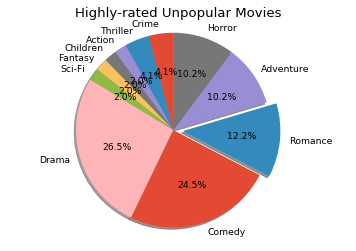

In [308]:
#import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')


plt.rcParams['font.size'] = 9.2

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Crime','Thriller', 'Action', 'Children', 'Fantasy', 'Sci-Fi','Drama','Comedy','Romance','Adventure','Horror'
sizes = [2, 2, 1, 1, 1,1,13, 12, 6, 5, 5]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()  

ax1.pie(sizes, explode=explode, labels=labels, labeldistance = 1.1, autopct='%1.1f%%',
        shadow=True, startangle=90)

#slices = sorted(sizes)
#fig = plt.figure(figsize=[10, 10])
#ax = fig.add_subplot(111)
#ax.set_title("Figure 1")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#fig1.figsize = [20,20]

ax1.set_title("Highly-rated Unpopular Movies")

plt.savefig('moviepie2', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

plt.show()